In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline


2022-03-15 09:17:23.732678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 09:17:23.732695: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from ML_classes.BasicModel import Baseline


In [3]:
df = pd.read_csv('./data/ouput.csv')
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

max_value_energy = df["energy(kWh/hh)"].max()
df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)
# Sorting the values
df.sort_values('tstp', inplace=True)

In [4]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000150")
hh.pop("LCLid")
hh = hh.set_index("tstp")
hh = hh.resample("H").sum()
hh = hh.reset_index()

In [5]:
# Initiating the class
deep_learner = Baseline(
data = hh,
Y_var = 'energy(kWh/hh)',
train_test_split = 0.15
)

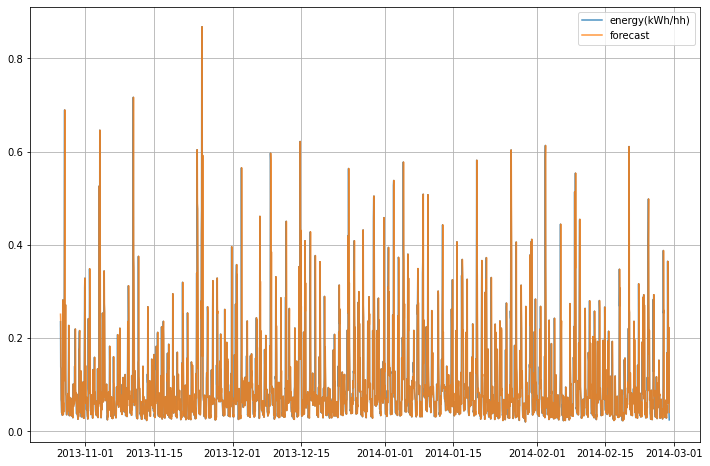

In [6]:
yhat = deep_learner.test_predictions()
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

/tmp/ipykernel_19592/3442304932.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc = fc.append(hat_frame)


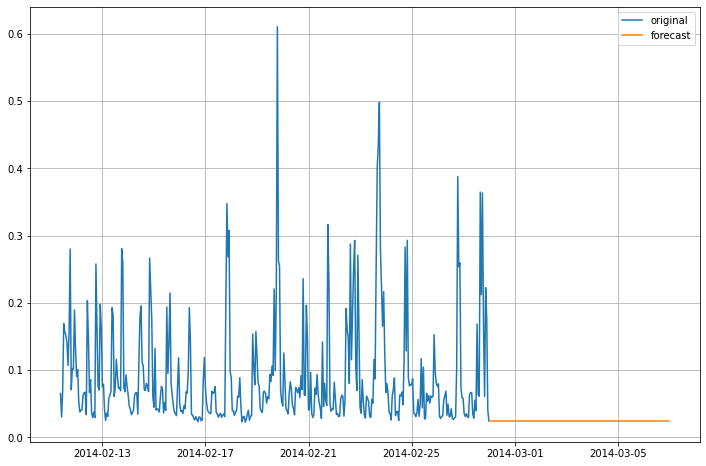

In [7]:

#Forecasting n steps ahead
n_ahead = 168
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y for y in yhat]

#Constructing the forecast dataframe
fc = hh.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)
#Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

In [8]:
deep_learner.evaluateMSE()

2979
2979


0.0062379399866675286

In [9]:
deep_learner.evaluateRMSE()

2979
2979


0.0789806304524567

In [10]:
deep_learner.evaluateMAE()

0.044402294257960655

In [11]:
deep_learner.evaluateMAPE()

43.23760047012922

In [12]:
deep_learner.test_predictions()

[0.25114256077442926,
 0.23503809197467979,
 0.1379760679622179,
 0.13558216631022352,
 0.06811752075175691,
 0.06354733764783639,
 0.040478782470718094,
 0.040261155784834045,
 0.03895538756225994,
 0.03960827248427397,
 0.03438520283688547,
 0.11556039770711363,
 0.28182809049383833,
 0.12448313722907062,
 0.036126226052681634,
 0.06115343113148015,
 0.042002177379176255,
 0.1379760679622179,
 0.12317737224940442,
 0.23003265712044513,
 0.4417845623677607,
 0.6892274646177992,
 0.23482047339606554,
 0.10837867653659095,
 0.216539721522936,
 0.27138195768487716,
 0.1329706298650753,
 0.07899891666120992,
 0.07616975515163163,
 0.04461371220287051,
 0.03590859774534362,
 0.035473342752121564,
 0.03873775925492193,
 0.04069641077805611,
 0.044396085516986455,
 0.043090317294412345,
 0.06855277736643292,
 0.05636561809876767,
 0.08117519649168212,
 0.05636561809876767,
 0.15908597161620203,
 0.22720349885377475,
 0.14733406572030486,
 0.03525571363405657,
 0.03351469285044134,
 0.0367791

In [13]:
deep_learner.predictions()

[0.09314472745200938,
 0.09314472745200938,
 0.1664853210940627,
 0.04744287371244881,
 0.03721436596791773,
 0.08313384315045443,
 0.06659412746475271,
 0.07899891666120994,
 0.09423286574579151,
 0.08900979609840301,
 0.09727965556270783,
 0.4130577036289333,
 0.4385201345147826,
 0.20587596689245263,
 0.10293798182477235,
 0.07878128835387192,
 0.06681175739354467,
 0.06528836248508652,
 0.05027203522202712,
 0.03286180792842731,
 0.031338412209242175,
 0.05701849977787378,
 0.0574537563925498,
 0.03068552809795512,
 0.03482045945156149,
 0.06376496595517439,
 0.05571273317675363,
 0.03482045945156149,
 0.03199129632052923,
 0.024591948464122493,
 0.058759522993669946,
 0.0968443989480318,
 0.12796518528211692,
 0.11425462786308557,
 0.13014146186968117,
 0.3088139422314091,
 0.2404787899294063,
 0.1978237357354858,
 0.099238307085842,
 0.09270947083733336,
 0.09031556594243106,
 0.09815016554915196,
 0.07029380058222909,
 0.06050054945237403,
 0.059194779608345974,
 0.0552774798049

In [14]:
c = hh.tail(len(yhat)).copy()
c

,tstp,energy(kWh/hh)
19695,2014-02-21 01:00:00,0.042220
19696,2014-02-21 02:00:00,0.096627
19697,2014-02-21 03:00:00,0.035473
19698,2014-02-21 04:00:00,0.029597
19699,2014-02-21 05:00:00,0.033950
...,...,...
19858,2014-02-27 20:00:00,0.060936
19859,2014-02-27 21:00:00,0.222851
19860,2014-02-27 22:00:00,0.176061
19861,2014-02-27 23:00:00,0.040479
